In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
import requests
from bs4 import BeautifulSoup

In [40]:
base_url = "http://www.chucknorrisfacts.fr/facts/top/"

# Générer les URLs pour les 5 premières pages
urls = [f"{base_url}{i}" for i in range(1, 6)]

urls

['http://www.chucknorrisfacts.fr/facts/top/1',
 'http://www.chucknorrisfacts.fr/facts/top/2',
 'http://www.chucknorrisfacts.fr/facts/top/3',
 'http://www.chucknorrisfacts.fr/facts/top/4',
 'http://www.chucknorrisfacts.fr/facts/top/5']

In [69]:
def scrape_chuck_norris_facts(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    facts = []
    notes = []

    fact_items = soup.find_all('div', {"class" : "card"})

    for item in fact_items:
        fact_text = item.find('p', {"class" : "card-text"}).text.strip()
        note = item.find("span").text.strip("()")
        facts.append(fact_text)
        notes.append(note.split("/")[0])

    return facts, notes

In [72]:
all_facts = []
all_notes = []

for url in urls:
    facts, notes = scrape_chuck_norris_facts(url)
    all_facts.extend(facts)
    all_notes.extend(notes)

# Create a DataFrame
data = {
    'Fact': all_facts,
    'Note': all_notes
}

df = pd.DataFrame(data)
print(df.to_markdown())

|    | Fact                                                                                                                                                                                                  |   Note |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------:|
|  0 | Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.                                                                                              |   8.87 |
|  1 | L'avenir se demande parfois ce que Chuck Norris lui réserve.                                                                                                                                          |   8.43 |
|  2 | Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.                                                       

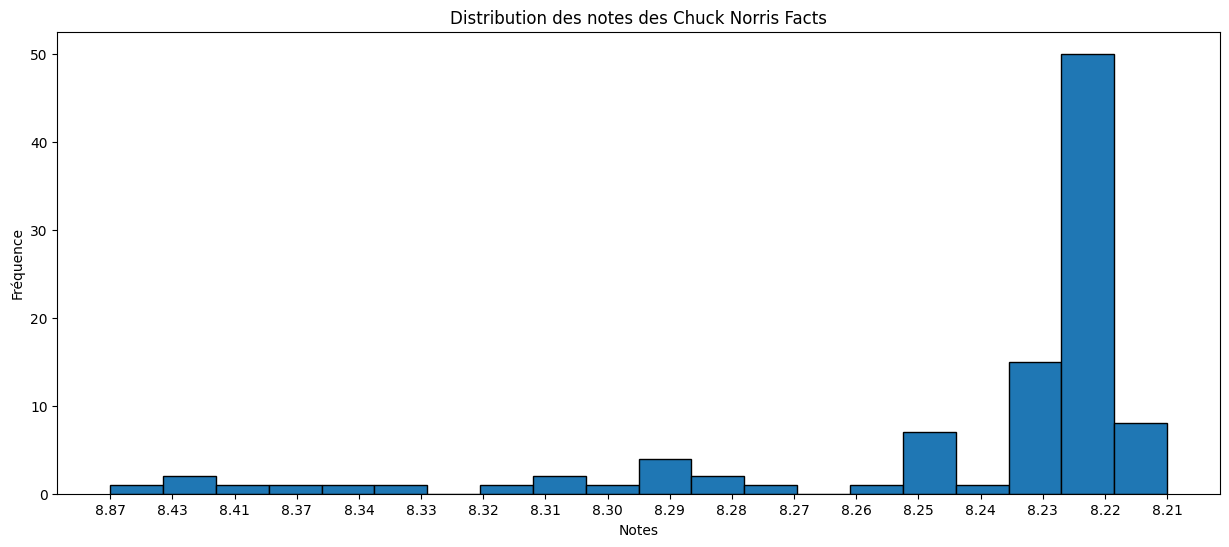

In [71]:
# Plot the distribution of notes
plt.figure(figsize=(15, 6))
plt.hist(df['Note'], bins=20, edgecolor='black')
plt.title('Distribution des notes des Chuck Norris Facts')
plt.xlabel('Notes')
plt.ylabel('Fréquence')
plt.show()